In [1]:
import json
import pandas as pd
import hdbscan
import numpy as np
from TFTClusterer import TFTClusterer
from save_matchdata import loaddb
from datetime import datetime, timedelta

In [2]:
db = loaddb(timestamp=(datetime.now() - timedelta(hours=24)).timestamp()*1000)
print(len(db))
assert len(db) > 0

11359


In [3]:
test=TFTClusterer(db)

In [4]:
print(len(test.clusterdf))

90721


In [5]:
test.cluster()

HDB Scan


In [6]:
test.unitshdb.to_csv("unitshdb.csv",index=False)
test.itemshdb.to_csv("itemshdb.csv",index=False)
test.traitshdb.to_csv("traitshdb.csv",index=False)
test.clusterdf[["comp_id","participants.placement","hdb","game_variation"]].to_csv("hdb.csv",index=False)

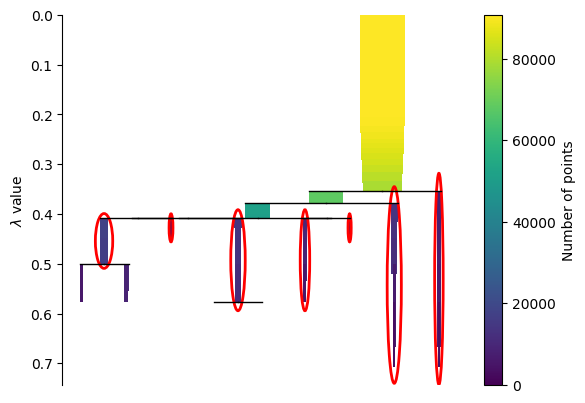

In [7]:
test.plot.figure

In [8]:
test.clusterdf['game_variation'].value_counts()

Normal Game          18665
The Neekoverse        9258
Star Cluster          9161
Superdense Galaxy     9144
Littler Legends       9033
Galactic Armory       8950
Treasure Trove        8946
Trade Sector          8897
Medium Legends        8667
Name: game_variation, dtype: int64